In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize']=[8,6]
sns.set_style('darkgrid')
air_data=pd.read_csv(r"Air_Quality.csv")
print(air_data.head())

   id country           state       city                         station  \
0   1   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
1   2   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
2   3   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
3   4   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
4   5   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   

  pollutant_id          last_update  pollutant_min  pollutant_max  \
0        PM2.5  21-10-2021 01:00:00           69.0          109.0   
1         PM10  21-10-2021 01:00:00           82.0          138.0   
2          NO2  21-10-2021 01:00:00           10.0           42.0   
3          NH3  21-10-2021 01:00:00            4.0            5.0   
4          SO2  21-10-2021 01:00:00           16.0           42.0   

   pollutant_avg  
0           86.0  
1          105.0  
2           19.0  
3            4.0  
4           27.0  


In [3]:
td_0=air_data

In [4]:
td_0[30:40]

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
30,31,India,Assam,Guwahati,"Pan Bazaar, Guwahati - APCB",NH3,21-10-2021 01:00:00,1.0,4.0,2.0
31,32,India,Assam,Guwahati,"Pan Bazaar, Guwahati - APCB",SO2,21-10-2021 01:00:00,82.0,101.0,88.0
32,33,India,Assam,Guwahati,"Pan Bazaar, Guwahati - APCB",CO,21-10-2021 01:00:00,1.0,28.0,7.0
33,34,India,Assam,Guwahati,"Pan Bazaar, Guwahati - APCB",OZONE,21-10-2021 01:00:00,13.0,24.0,20.0
34,35,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",PM2.5,21-10-2021 01:00:00,2.0,38.0,11.0
35,36,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",PM10,21-10-2021 01:00:00,6.0,32.0,14.0
36,37,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",NO2,21-10-2021 01:00:00,5.0,5.0,5.0
37,38,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",NH3,21-10-2021 01:00:00,1.0,1.0,1.0
38,39,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",SO2,21-10-2021 01:00:00,37.0,40.0,38.0
39,40,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",CO,21-10-2021 01:00:00,10.0,19.0,11.0


<AxesSubplot:ylabel='pollutant_avg'>

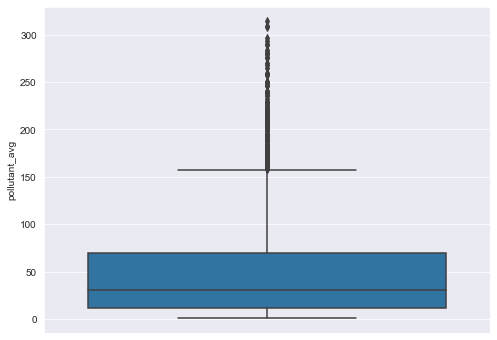

In [5]:
sns.boxplot(y='pollutant_avg',data=td_0)

<AxesSubplot:ylabel='pollutant_min'>

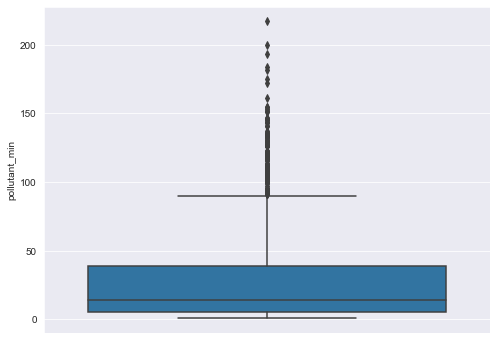

In [6]:
sns.boxplot(y='pollutant_min',data=td_0)

<AxesSubplot:ylabel='pollutant_max'>

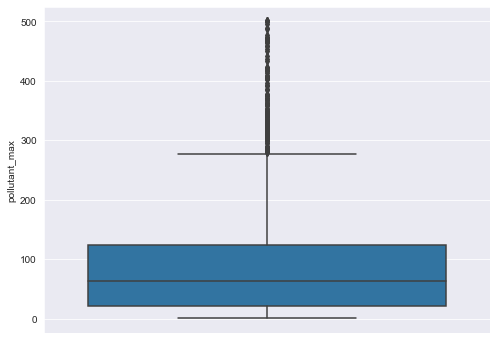

In [7]:
sns.boxplot(y='pollutant_max',data=td_0)

In [8]:
#finding the quartiles for min
IQR=td_0['pollutant_min'].quantile(0.75)-td_0['pollutant_min'].quantile(0.25)
lower_pollutant_min_limit=td_0['pollutant_min'].quantile(0.25)-(IQR*1.5)
upper_pollutant_min_limit=td_0['pollutant_min'].quantile(0.75)+(IQR*1.5)
print(lower_pollutant_min_limit)
print(upper_pollutant_min_limit)

-46.0
90.0


In [9]:
#finding the quartiles for avg
IQR=td_0['pollutant_avg'].quantile(0.75)-td_0['pollutant_avg'].quantile(0.25)
lower_pollutant_avg_limit=td_0['pollutant_avg'].quantile(0.25)-(IQR*1.5)
upper_pollutant_avg_limit=td_0['pollutant_avg'].quantile(0.75)+(IQR*1.5)
print(lower_pollutant_avg_limit)
print(upper_pollutant_avg_limit)

-75.0
157.0


In [10]:
#finding the quartiles for max
IQR=td_0['pollutant_max'].quantile(0.75)-td_0['pollutant_max'].quantile(0.25)
lower_pollutant_max_limit=td_0['pollutant_max'].quantile(0.25)-(IQR*1.5)
upper_pollutant_max_limit=td_0['pollutant_max'].quantile(0.75)+(IQR*1.5)
print(lower_pollutant_max_limit)
print(upper_pollutant_max_limit)

-133.5
278.5


In [11]:
#finding outlier values in pollutant_avg coloumn
pollutantavg_outliers=np.where(td_0['pollutant_avg']>upper_pollutant_avg_limit,True,np.where(td_0['pollutant_avg']<lower_pollutant_avg_limit,True,False))
pollutantavg_outliers[1:40]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [12]:
#finding outlier values in pollutant_min coloumn
pollutantmin_outliers=np.where(td_0['pollutant_min']>upper_pollutant_min_limit,True,np.where(td_0['pollutant_min']<lower_pollutant_min_limit,True,False))
pollutantmin_outliers[1:40]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [13]:
#finding outlier values in pollutant_max coloumn
pollutantmax_outliers=np.where(td_0['pollutant_max']>upper_pollutant_max_limit,True,np.where(td_0['pollutant_max']<lower_pollutant_max_limit,True,False))
pollutantmax_outliers[1:40]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [14]:
#Outlioer trimming(removing the outlier value in pollutant_avg column)
airquality_without_pollutantavg_outliers=td_0.loc[~(pollutantavg_outliers),]
td_0.shape,airquality_without_pollutantavg_outliers.shape

((1836, 10), (1681, 10))

In [15]:
#Outlioer trimming(removing the outlier value in pollutant_min column)
airquality_without_pollutantmin_outliers=td_0.loc[~(pollutantmin_outliers),]
td_0.shape,airquality_without_pollutantmin_outliers.shape

((1836, 10), (1711, 10))

In [16]:
#Outlioer trimming(removing the outlier value in pollutant_max column)
airquality_without_pollutantmax_outliers=td_0.loc[~(pollutantmax_outliers),]
td_0.shape,airquality_without_pollutantmax_outliers.shape

((1836, 10), (1672, 10))

In [17]:
airquality_without_pollutantavg_outliers[30:40]

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
31,32,India,Assam,Guwahati,"Pan Bazaar, Guwahati - APCB",SO2,21-10-2021 01:00:00,82.0,101.0,88.0
32,33,India,Assam,Guwahati,"Pan Bazaar, Guwahati - APCB",CO,21-10-2021 01:00:00,1.0,28.0,7.0
33,34,India,Assam,Guwahati,"Pan Bazaar, Guwahati - APCB",OZONE,21-10-2021 01:00:00,13.0,24.0,20.0
34,35,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",PM2.5,21-10-2021 01:00:00,2.0,38.0,11.0
35,36,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",PM10,21-10-2021 01:00:00,6.0,32.0,14.0
36,37,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",NO2,21-10-2021 01:00:00,5.0,5.0,5.0
37,38,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",NH3,21-10-2021 01:00:00,1.0,1.0,1.0
38,39,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",SO2,21-10-2021 01:00:00,37.0,40.0,38.0
39,40,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",CO,21-10-2021 01:00:00,10.0,19.0,11.0
40,41,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",OZONE,21-10-2021 01:00:00,18.0,21.0,20.0


In [18]:
airquality_without_pollutantmin_outliers[30:40]

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
30,31,India,Assam,Guwahati,"Pan Bazaar, Guwahati - APCB",NH3,21-10-2021 01:00:00,1.0,4.0,2.0
31,32,India,Assam,Guwahati,"Pan Bazaar, Guwahati - APCB",SO2,21-10-2021 01:00:00,82.0,101.0,88.0
32,33,India,Assam,Guwahati,"Pan Bazaar, Guwahati - APCB",CO,21-10-2021 01:00:00,1.0,28.0,7.0
33,34,India,Assam,Guwahati,"Pan Bazaar, Guwahati - APCB",OZONE,21-10-2021 01:00:00,13.0,24.0,20.0
34,35,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",PM2.5,21-10-2021 01:00:00,2.0,38.0,11.0
35,36,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",PM10,21-10-2021 01:00:00,6.0,32.0,14.0
36,37,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",NO2,21-10-2021 01:00:00,5.0,5.0,5.0
37,38,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",NH3,21-10-2021 01:00:00,1.0,1.0,1.0
38,39,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",SO2,21-10-2021 01:00:00,37.0,40.0,38.0
39,40,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",CO,21-10-2021 01:00:00,10.0,19.0,11.0


In [19]:
airquality_without_pollutantmax_outliers[30:40]

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
31,32,India,Assam,Guwahati,"Pan Bazaar, Guwahati - APCB",SO2,21-10-2021 01:00:00,82.0,101.0,88.0
32,33,India,Assam,Guwahati,"Pan Bazaar, Guwahati - APCB",CO,21-10-2021 01:00:00,1.0,28.0,7.0
33,34,India,Assam,Guwahati,"Pan Bazaar, Guwahati - APCB",OZONE,21-10-2021 01:00:00,13.0,24.0,20.0
34,35,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",PM2.5,21-10-2021 01:00:00,2.0,38.0,11.0
35,36,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",PM10,21-10-2021 01:00:00,6.0,32.0,14.0
36,37,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",NO2,21-10-2021 01:00:00,5.0,5.0,5.0
37,38,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",NH3,21-10-2021 01:00:00,1.0,1.0,1.0
38,39,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",SO2,21-10-2021 01:00:00,37.0,40.0,38.0
39,40,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",CO,21-10-2021 01:00:00,10.0,19.0,11.0
40,41,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",OZONE,21-10-2021 01:00:00,18.0,21.0,20.0


<AxesSubplot:ylabel='pollutant_avg'>

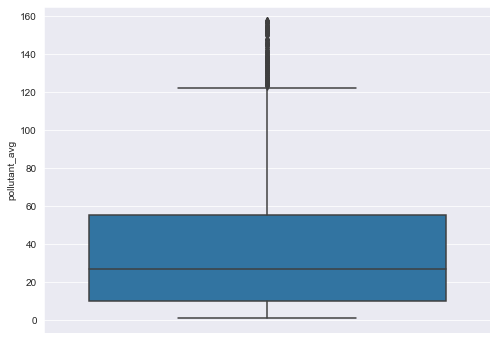

In [20]:
#plot boxplot for pollutant_avg column after removing outlier
sns.boxplot(y='pollutant_avg',data=airquality_without_pollutantavg_outliers)

<AxesSubplot:ylabel='pollutant_min'>

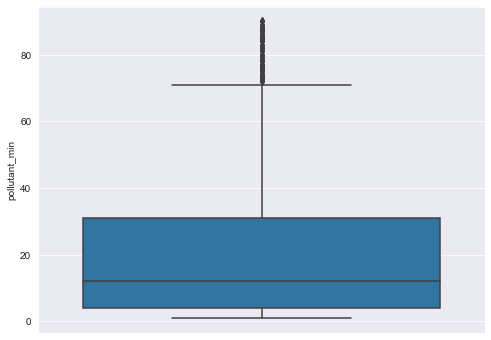

In [21]:
#plot boxplot for pollutant_min column after removing outlier
sns.boxplot(y='pollutant_min',data=airquality_without_pollutantmin_outliers)

<AxesSubplot:ylabel='pollutant_max'>

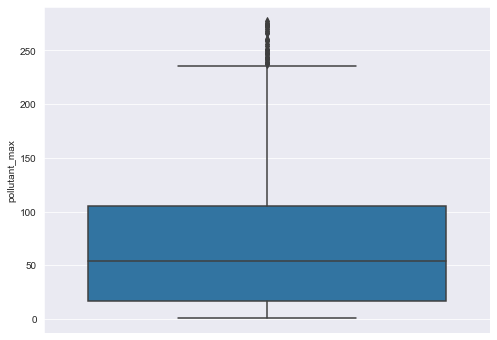

In [22]:
#plot boxplot for pollutant_max column after removing outlier
sns.boxplot(y='pollutant_max',data=airquality_without_pollutantmax_outliers)

## Outliers capping

### Outlier capping using IQR

<AxesSubplot:ylabel='pollutant_avg'>

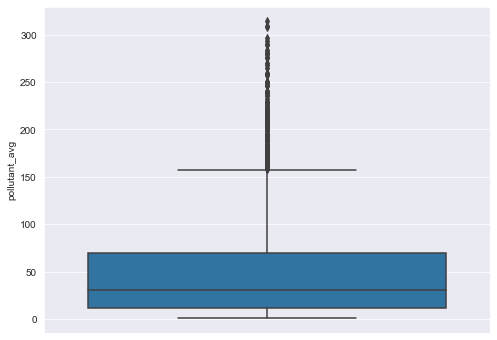

In [23]:
#boxplot for the pollutant_avg column in air quality dataset
sns.boxplot(y='pollutant_avg',data=td_0)

<AxesSubplot:ylabel='pollutant_min'>

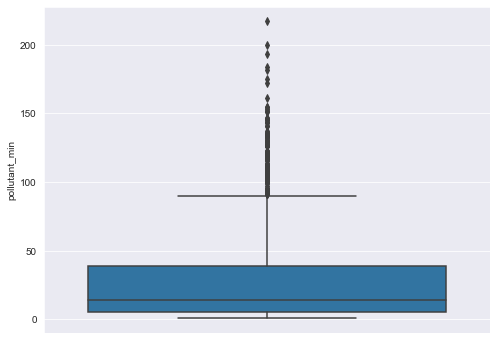

In [24]:
#boxplot for the pollutant_min column in air quality dataset
sns.boxplot(y='pollutant_min',data=td_0)

<AxesSubplot:ylabel='pollutant_max'>

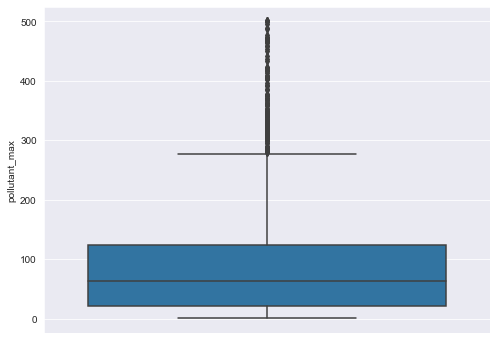

In [25]:
#boxplot for the pollutant_max column in air quality dataset
sns.boxplot(y='pollutant_max',data=td_0)

C:\Users\kshit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pollutant_avg', ylabel='Density'>

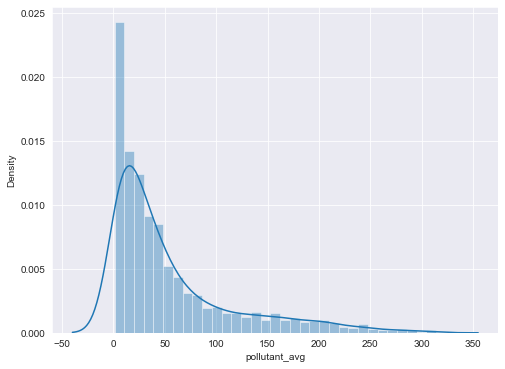

In [26]:
sns.distplot(td_0['pollutant_avg'])

C:\Users\kshit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pollutant_min', ylabel='Density'>

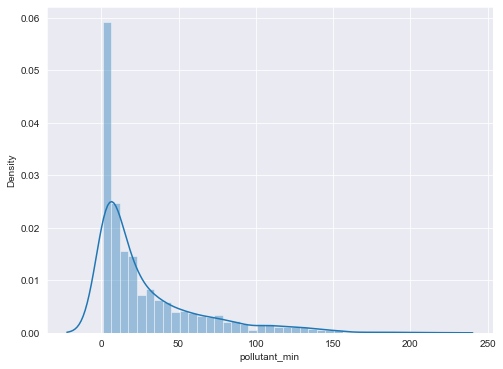

In [27]:
sns.distplot(td_0['pollutant_min'])

C:\Users\kshit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pollutant_max', ylabel='Density'>

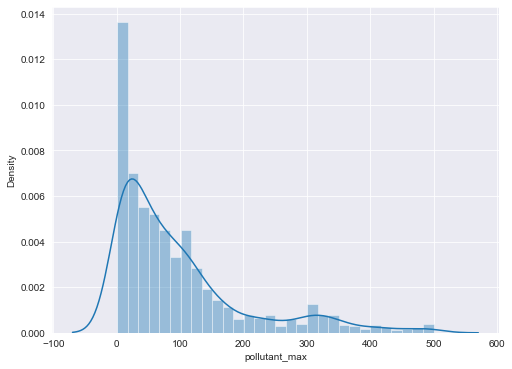

In [28]:
sns.distplot(td_0['pollutant_max'])

In [29]:
IQR = td_0["pollutant_avg"].quantile (0.75) - td_0["pollutant_avg"].quantile(0.25) 
lower_pollutant_limit= td_0["pollutant_avg"].quantile (0.25)- (IQR *1.5)
upper_pollutant_limit = td_0["pollutant_avg"].quantile (0.75) +(IQR *1.5)
print (lower_pollutant_limit)
print (upper_pollutant_limit)

-75.0
157.0


In [30]:
IQR = td_0["pollutant_min"].quantile (0.75) - td_0["pollutant_min"].quantile(0.25) 
lower_pollutant_min_limit= td_0["pollutant_min"].quantile (0.25)- (IQR *1.5)
upper_pollutant_min_limit = td_0["pollutant_min"].quantile (0.75) +(IQR *1.5)
print (lower_pollutant_min_limit)
print (upper_pollutant_min_limit)

-46.0
90.0


In [31]:
IQR = td_0["pollutant_max"].quantile (0.75) - td_0["pollutant_max"].quantile(0.25) 
lower_pollutant_max_limit= td_0["pollutant_max"].quantile (0.25)- (IQR *1.5)
upper_pollutant_max_limit = td_0["pollutant_max"].quantile (0.75) +(IQR *1.5)
print (lower_pollutant_max_limit)
print (upper_pollutant_max_limit)

-133.5
278.5


In [32]:
td_0["pollutant_avg"]= np.where (td_0["pollutant_avg"]> upper_pollutant_avg_limit, upper_pollutant_avg_limit, np.where(td_0["pollutant_avg"] < lower_pollutant_avg_limit, lower_pollutant_avg_limit, td_0["pollutant_avg"]))
td_0

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,21-10-2021 01:00:00,69.0,109.0,86.0
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,21-10-2021 01:00:00,82.0,138.0,105.0
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,21-10-2021 01:00:00,10.0,42.0,19.0
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,21-10-2021 01:00:00,4.0,5.0,4.0
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,21-10-2021 01:00:00,16.0,42.0,27.0
...,...,...,...,...,...,...,...,...,...,...
1831,1832,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",NO2,21-10-2021 01:00:00,10.0,22.0,15.0
1832,1833,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",NH3,21-10-2021 01:00:00,1.0,3.0,2.0
1833,1834,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",SO2,21-10-2021 01:00:00,6.0,28.0,10.0
1834,1835,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",CO,21-10-2021 01:00:00,34.0,92.0,41.0


In [33]:
td_0["pollutant_min"]= np.where (td_0["pollutant_min"]> upper_pollutant_min_limit, upper_pollutant_min_limit, np.where(td_0["pollutant_min"] < lower_pollutant_min_limit, lower_pollutant_min_limit, td_0["pollutant_min"]))
td_0

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,21-10-2021 01:00:00,69.0,109.0,86.0
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,21-10-2021 01:00:00,82.0,138.0,105.0
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,21-10-2021 01:00:00,10.0,42.0,19.0
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,21-10-2021 01:00:00,4.0,5.0,4.0
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,21-10-2021 01:00:00,16.0,42.0,27.0
...,...,...,...,...,...,...,...,...,...,...
1831,1832,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",NO2,21-10-2021 01:00:00,10.0,22.0,15.0
1832,1833,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",NH3,21-10-2021 01:00:00,1.0,3.0,2.0
1833,1834,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",SO2,21-10-2021 01:00:00,6.0,28.0,10.0
1834,1835,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",CO,21-10-2021 01:00:00,34.0,92.0,41.0


In [34]:
td_0["pollutant_max"]= np.where (td_0["pollutant_max"]> upper_pollutant_max_limit, upper_pollutant_max_limit, np.where(td_0["pollutant_max"] < lower_pollutant_max_limit, lower_pollutant_max_limit, td_0["pollutant_max"]))
td_0

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,21-10-2021 01:00:00,69.0,109.0,86.0
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,21-10-2021 01:00:00,82.0,138.0,105.0
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,21-10-2021 01:00:00,10.0,42.0,19.0
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,21-10-2021 01:00:00,4.0,5.0,4.0
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,21-10-2021 01:00:00,16.0,42.0,27.0
...,...,...,...,...,...,...,...,...,...,...
1831,1832,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",NO2,21-10-2021 01:00:00,10.0,22.0,15.0
1832,1833,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",NH3,21-10-2021 01:00:00,1.0,3.0,2.0
1833,1834,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",SO2,21-10-2021 01:00:00,6.0,28.0,10.0
1834,1835,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",CO,21-10-2021 01:00:00,34.0,92.0,41.0


In [35]:
td_0[30:40]

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
30,31,India,Assam,Guwahati,"Pan Bazaar, Guwahati - APCB",NH3,21-10-2021 01:00:00,1.0,4.0,2.0
31,32,India,Assam,Guwahati,"Pan Bazaar, Guwahati - APCB",SO2,21-10-2021 01:00:00,82.0,101.0,88.0
32,33,India,Assam,Guwahati,"Pan Bazaar, Guwahati - APCB",CO,21-10-2021 01:00:00,1.0,28.0,7.0
33,34,India,Assam,Guwahati,"Pan Bazaar, Guwahati - APCB",OZONE,21-10-2021 01:00:00,13.0,24.0,20.0
34,35,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",PM2.5,21-10-2021 01:00:00,2.0,38.0,11.0
35,36,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",PM10,21-10-2021 01:00:00,6.0,32.0,14.0
36,37,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",NO2,21-10-2021 01:00:00,5.0,5.0,5.0
37,38,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",NH3,21-10-2021 01:00:00,1.0,1.0,1.0
38,39,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",SO2,21-10-2021 01:00:00,37.0,40.0,38.0
39,40,India,Assam,Guwahati,"Railway Colony, Guwahati - APCB",CO,21-10-2021 01:00:00,10.0,19.0,11.0


<AxesSubplot:ylabel='pollutant_avg'>

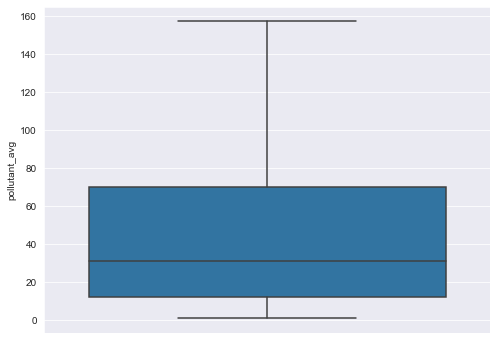

In [36]:
sns.boxplot(y='pollutant_avg',data=td_0)

<AxesSubplot:ylabel='pollutant_min'>

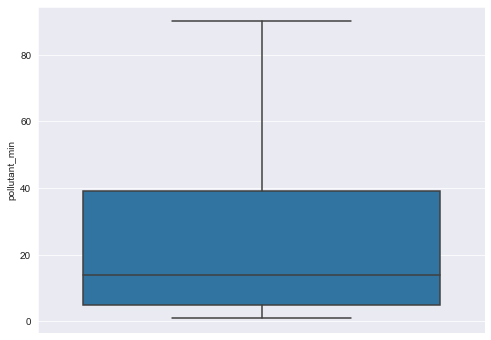

In [37]:
sns.boxplot(y='pollutant_min',data=td_0)

<AxesSubplot:ylabel='pollutant_max'>

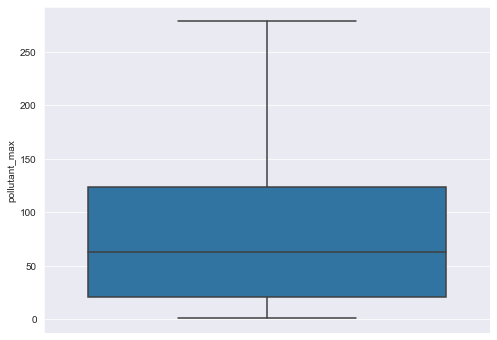

In [38]:
sns.boxplot(y='pollutant_max',data=td_0)

### Outlier capping using mean and std

In [39]:
lower_pollutant_avg_limit= td_0["pollutant_avg"].mean()-(3 *td_0["pollutant_avg"].std()) 
upper_pollutant_avg_limit= td_0["pollutant_avg"].mean() + (3 *td_0["pollutant_avg"].std())

print (lower_pollutant_avg_limit)
print (upper_pollutant_avg_limit)

-97.20129917369792
196.37621286759895


In [40]:
lower_pollutant_min_limit= td_0["pollutant_min"].mean()-(3 *td_0["pollutant_min"].std()) 
upper_pollutant_min_limit= td_0["pollutant_min"].mean() + (3 *td_0["pollutant_min"].std())

print (lower_pollutant_min_limit)
print (upper_pollutant_min_limit)

-57.49108019270969
109.67519987050025


In [41]:
lower_pollutant_max_limit= td_0["pollutant_max"].mean()-(3 *td_0["pollutant_max"].std()) 
upper_pollutant_max_limit= td_0["pollutant_max"].mean() + (3 *td_0["pollutant_max"].std())

print (lower_pollutant_max_limit)
print (upper_pollutant_max_limit)

-165.17821493445274
343.7973173510235


<AxesSubplot:ylabel='pollutant_avg'>

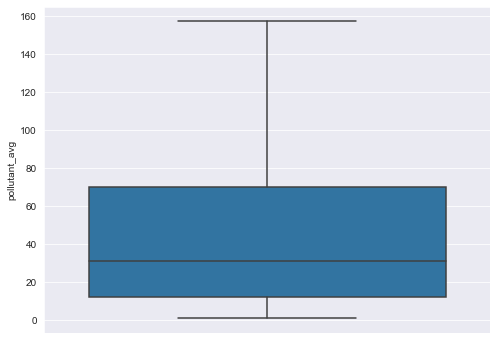

In [42]:
# Now replace the outlier values by the upper and Lower limits.

td_0["pollutant_avg"]= np.where(td_0["pollutant_avg"]> upper_pollutant_avg_limit, upper_pollutant_avg_limit, np.where(td_0["pollutant_avg"] < lower_pollutant_avg_limit, lower_pollutant_avg_limit, td_0["pollutant_avg"]))
sns.boxplot(y='pollutant_avg',data=td_0)

<AxesSubplot:ylabel='pollutant_min'>

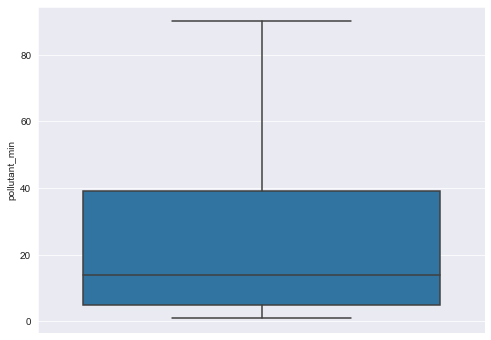

In [43]:
# Now replace the outlier values by the upper and Lower limits.

td_0["pollutant_min"]= np.where(td_0["pollutant_min"]> upper_pollutant_min_limit, upper_pollutant_min_limit, np.where(td_0["pollutant_min"] < lower_pollutant_min_limit, lower_pollutant_min_limit, td_0["pollutant_min"]))
sns.boxplot(y='pollutant_min',data=td_0)

<AxesSubplot:ylabel='pollutant_max'>

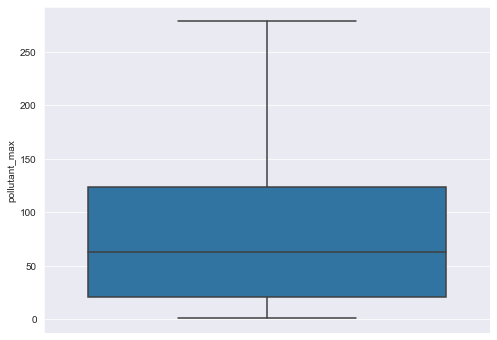

In [44]:
# Now replace the outlier values by the upper and Lower limits.

td_0["pollutant_max"]= np.where(td_0["pollutant_max"]> upper_pollutant_max_limit, upper_pollutant_max_limit, np.where(td_0["pollutant_max"] < lower_pollutant_max_limit, lower_pollutant_max_limit, td_0["pollutant_max"]))
sns.boxplot(y='pollutant_max',data=td_0)

## Outlier capping using quantiles

<AxesSubplot:ylabel='pollutant_avg'>

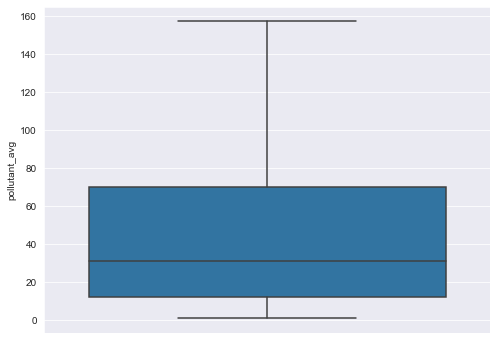

In [45]:
#plot a box plot for the pollutant_avg column of the airquality dataset. 
sns.boxplot(y='pollutant_avg', data=td_0)

<AxesSubplot:ylabel='pollutant_min'>

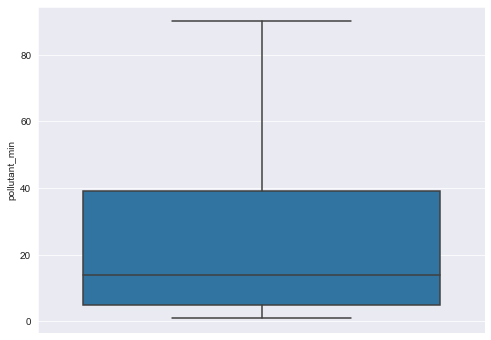

In [46]:
#plot a box plot for the pollutant_min column of the airquality dataset. 
sns.boxplot(y='pollutant_min', data=td_0)

<AxesSubplot:ylabel='pollutant_max'>

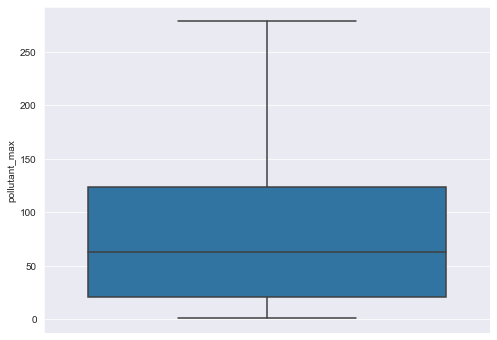

In [47]:
#plot a box plot for the pollutant_max column of the airquality dataset. 
sns.boxplot(y='pollutant_max', data=td_0)

In [48]:
# setting 0.05 as the Lower Limit and 0.95 as the upper Limit for the quantiles to find the outliers

lower_pollutant_avg_limit= td_0["pollutant_avg"].quantile (0.05) 
upper_pollutant_avg_limit = td_0["pollutant_avg"].quantile (0.95)

print(lower_pollutant_avg_limit) 
print(upper_pollutant_avg_limit)


3.0
157.0


In [49]:
# setting 0.05 as the Lower Limit and 0.95 as the upper Limit for the quantiles to find the outliers

lower_pollutant_min_limit= td_0["pollutant_min"].quantile (0.05) 
upper_pollutant_min_limit = td_0["pollutant_min"].quantile (0.95)

print(lower_pollutant_min_limit) 
print(upper_pollutant_min_limit)


1.0
90.0


In [50]:
# setting 0.05 as the Lower Limit and 0.95 as the upper Limit for the quantiles to find the outliers

lower_pollutant_max_limit= td_0["pollutant_max"].quantile (0.05) 
upper_pollutant_max_limit = td_0["pollutant_max"].quantile (0.95)

print(lower_pollutant_max_limit) 
print(upper_pollutant_max_limit)


4.0
278.5


In [51]:
# The output shows that anything beyond 3.0 is an outlier, and similarly, the fare value below 157.0 is also an outiter.

# Now replace the outlier values by the upper and Lower Limit.

td_0["pollutant_avg"]= np.where(td_0["pollutant_avg"]> upper_pollutant_avg_limit, upper_pollutant_avg_limit, np.where(td_0["pollutant_avg"] < lower_pollutant_avg_limit, lower_pollutant_avg_limit, td_0["pollutant_avg"]))
td_0.pollutant_avg[1:40]

1     105.0
2      19.0
3       4.0
4      27.0
5      32.0
6      42.0
7      71.0
8      86.0
9      23.0
10      4.0
11      5.0
12     20.0
13     18.0
14     92.0
15     86.0
16     49.0
17      3.0
18      7.0
19     51.0
20     25.0
21    157.0
22    157.0
23     91.0
24      4.0
25     10.0
26     46.0
27     25.0
28     11.0
29      5.0
30      3.0
31     88.0
32      7.0
33     20.0
34     11.0
35     14.0
36      5.0
37      3.0
38     38.0
39     11.0
Name: pollutant_avg, dtype: float64

In [52]:
# The output shows that anything beyond 3.0 is an outlier, and similarly, the fare value below 157.0 is also an outiter.

# Now replace the outlier values by the upper and Lower Limit.

td_0["pollutant_min"]= np.where(td_0["pollutant_min"]> upper_pollutant_min_limit, upper_pollutant_min_limit, np.where(td_0["pollutant_min"] < lower_pollutant_min_limit, lower_pollutant_min_limit, td_0["pollutant_min"]))
td_0.pollutant_min[1:40]

1     82.0
2     10.0
3      4.0
4     16.0
5     15.0
6      4.0
7     47.0
8     49.0
9     11.0
10     2.0
11     1.0
12     2.0
13     2.0
14    76.0
15    66.0
16    14.0
17     1.0
18     4.0
19    39.0
20     9.0
21    78.0
22    77.0
23    13.0
24     2.0
25     2.0
26    25.0
27     5.0
28     1.0
29     1.0
30     1.0
31    82.0
32     1.0
33    13.0
34     2.0
35     6.0
36     5.0
37     1.0
38    37.0
39    10.0
Name: pollutant_min, dtype: float64

In [53]:
# The output shows that anything beyond 3.0 is an outlier, and similarly, the fare value below 157.0 is also an outiter.

# Now replace the outlier values by the upper and Lower Limit.

td_0["pollutant_max"]= np.where(td_0["pollutant_max"]> upper_pollutant_max_limit, upper_pollutant_max_limit, np.where(td_0["pollutant_max"] < lower_pollutant_max_limit, lower_pollutant_max_limit, td_0["pollutant_max"]))
td_0.pollutant_max[1:40]

1     138.0
2      42.0
3       5.0
4      42.0
5      45.0
6      82.0
7     111.0
8     120.0
9      44.0
10      6.0
11      9.0
12     52.0
13     34.0
14    131.0
15    120.0
16     88.0
17      4.0
18     10.0
19     68.0
20     49.0
21    278.5
22    276.0
23    187.0
24      9.0
25     15.0
26    154.0
27     46.0
28     31.0
29     13.0
30      4.0
31    101.0
32     28.0
33     24.0
34     38.0
35     32.0
36      5.0
37      4.0
38     40.0
39     19.0
Name: pollutant_max, dtype: float64

<AxesSubplot:ylabel='pollutant_avg'>

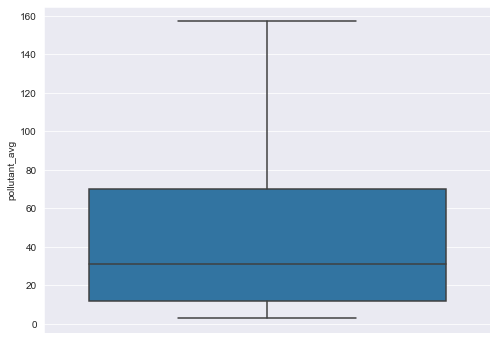

In [54]:
# plot a box plot for the pollutant_avg column of the air quality dataset after removing outliers using the quantile method. 
sns.boxplot(y="pollutant_avg", data=td_0)

<AxesSubplot:ylabel='pollutant_min'>

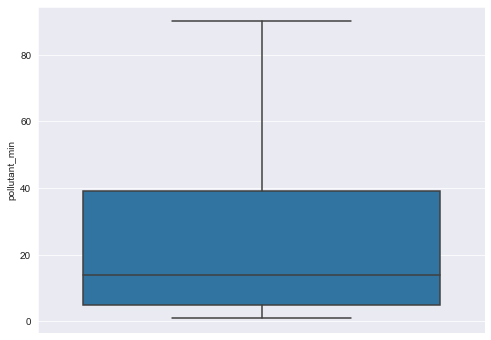

In [55]:
# plot a box plot for the pollutant_min column of the air quality dataset after removing outliers using the quantile method. 
sns.boxplot(y="pollutant_min", data=td_0)

<AxesSubplot:ylabel='pollutant_max'>

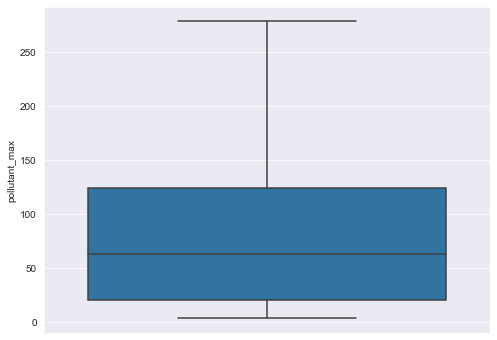

In [56]:
# plot a box plot for the pollutant_max column of the air quality dataset after removing outliers using the quantile method. 
sns.boxplot(y="pollutant_max", data=td_0)

### Outlier capping using custom values

In [57]:
print(td_0.pollutant_avg.max())
print(td_0.pollutant_avg.min())

157.0
3.0


In [58]:
print(td_0.pollutant_min.max())
print(td_0.pollutant_min.min())

90.0
1.0


In [59]:
print(td_0.pollutant_max.max())
print(td_0.pollutant_max.min())

278.5
4.0


In [60]:
# replace all the values greater than 50 in the pollutant_avg column of the air quality dataset by 58. Similarly, values 
# # Less than 10 have been arbitrarily replaced by 20.

td_0["pollutant_avg"]= np.where(td_0["pollutant_avg"]> 50, 50, np.where(td_0["pollutant_avg"] < 10, 10, td_0["pollutant_avg"]))

In [61]:
# replace all the values greater than 50 in the pollutant_min column of the air quality dataset by 58. Similarly, values 
# # Less than 10 have been arbitrarily replaced by 20.

td_0["pollutant_min"]= np.where(td_0["pollutant_min"]> 50, 50, np.where(td_0["pollutant_min"] < 10, 10, td_0["pollutant_min"]))

In [62]:
# replace all the values greater than 50 in the pollutant_max column of the air quality dataset by 58. Similarly, values 
# # Less than 10 have been arbitrarily replaced by 20.

td_0["pollutant_max"]= np.where(td_0["pollutant_max"]> 50, 50, np.where(td_0["pollutant_max"] < 10, 10, td_0["pollutant_max"]))

In [63]:
#now print the maximum and minimum values for the pollutant_avg column of the air quality dataset.

print(td_0.pollutant_avg.max())
print(td_0.pollutant_avg.min())

50.0
10.0


In [64]:
#now print the maximum and minimum values for the pollutant_min column of the air quality dataset.

print(td_0.pollutant_min.max())
print(td_0.pollutant_min.min())

50.0
10.0


In [65]:
#now print the maximum and minimum values for the pollutant_max column of the air quality dataset.

print(td_0.pollutant_max.max())
print(td_0.pollutant_max.min())

50.0
10.0


<AxesSubplot:ylabel='pollutant_avg'>

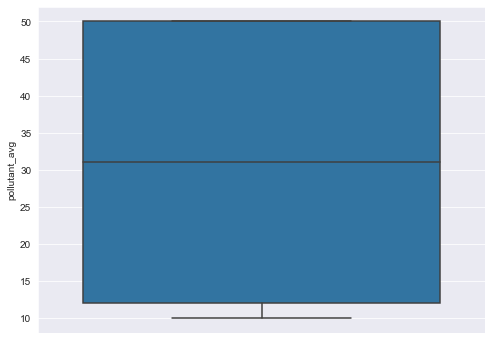

In [66]:
sns.boxplot(y="pollutant_avg", data=td_0)

<AxesSubplot:ylabel='pollutant_min'>

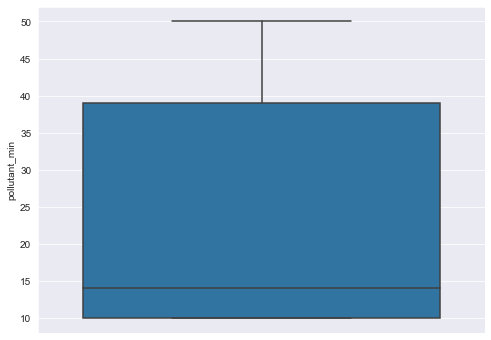

In [67]:
sns.boxplot(y="pollutant_min", data=td_0)

<AxesSubplot:ylabel='pollutant_max'>

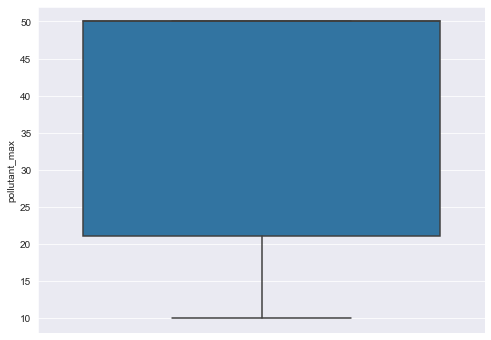

In [68]:
sns.boxplot(y="pollutant_max", data=td_0)